In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def regression(x,y):
    perp = x.T.dot(y)
    val = np.linalg.inv(x.T.dot(x)).dot(perp)
    return val

In [3]:
gradAd = pd.read_csv('Graduate Admissions.csv')
gradAd.drop('Serial No.',axis = 1,inplace = True)
gradAd.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
gradAd.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


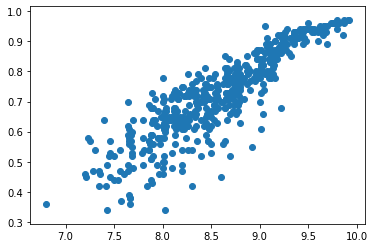

In [5]:
plt.scatter(gradAd['CGPA'],gradAd['Chance of Admit '])

In [14]:
sub = pd.DataFrame(gradAd['CGPA'])
sub.insert(loc = 0,column = 'bias', value = 1)
x = np.array(sub)
y = np.array(gradAd['Chance of Admit '])
y = y.reshape(y.shape[0],1)
theta = regression(x,y)

In [15]:
theta

array([[-1.04433492],
       [ 0.20592168]])

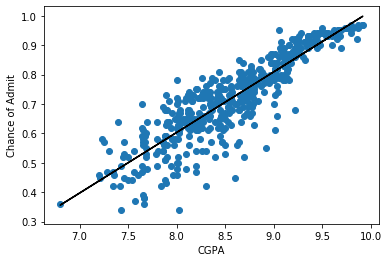

In [16]:
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.scatter(gradAd['CGPA'],gradAd['Chance of Admit '])
plt.plot(gradAd['CGPA'], x.dot(theta),color='black')

**The slope when the CGPA is greater than 9 is smaller than that of the line of best fit, which can be interpreted in the sense that above a certain threshold, the chance of admission does not change much with the change in CGPA as it does for lesser CGPA.**

In [9]:
sub = pd.DataFrame(gradAd['CGPA'][gradAd['CGPA']>9.0])
sub.insert(loc = 0,column = 'bias', value = 1)
x = np.array(sub)
y = np.array(gradAd['Chance of Admit '][gradAd['CGPA']>9.0])
y = y.reshape(y.shape[0],1)
theta = regression(x,y)

In [10]:
theta

array([[-0.90134048],
       [ 0.19133313]])

In [11]:
sub = pd.DataFrame(gradAd['CGPA'][gradAd['CGPA']<9.0])
sub.insert(loc = 0,column = 'bias', value = 1)
x = np.array(sub)
y = np.array(gradAd['Chance of Admit '][gradAd['CGPA']<9.0])
y = y.reshape(y.shape[0],1)
theta = regression(x,y)

In [12]:
theta

array([[-0.9455322 ],
       [ 0.19370349]])